In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

import numpy as np


In [2]:
# 读入数据
df = pd.read_excel("F:/美团商分赛/聚类分析/03 数据整合.xlsx",sheet_name = 0)
#df_features = pd.read_csv(r'F:/Job/9.美团比赛/data0413.csv',encoding='gbk',usecols=[3,4,5,6,7,8,9,10,11,12]) 

In [3]:
df

,城区具体名称,城市,区/县,土地面积(平方公里),常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),人均地区生产总值(元),地区生产总值增长率(%),城镇化率(%),消费价格指数,食品消费价格指数,传统买菜点数量,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
0,深圳福田区,深圳,福田区,78.66,166.29,20769.0,17.873539,45464993.0,273407.859763,7.2,8.0,103.4,109.0,1,32,0.406814,0.192435
1,深圳罗湖区,深圳,罗湖区,78.75,105.66,13205.0,16.059236,23902556.0,226221.427219,6.8,8.5,103.4,109.0,1,14,0.177778,0.132500
2,深圳盐田区,深圳,盐田区,74.99,24.36,3239.0,2.881844,6564795.0,269490.763547,8.2,9.0,103.4,109.0,0,2,0.026670,0.082102
3,深圳南山区,深圳,南山区,187.53,154.58,7965.0,34.949116,61036866.0,394856.165093,7.6,9.5,103.4,109.0,6,40,0.213299,0.258766
4,深圳宝安区,深圳,宝安区,396.61,334.25,8214.0,25.999141,38535847.0,115290.492147,6.6,10.0,103.4,109.0,0,54,0.136154,0.161556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,东莞横沥镇,东莞,横沥镇,44.70,20.81,4655.0,10.194175,1664500.0,79985.583854,7.4,98.0,103.5,110.6,4,0,0.000000,0.000000
181,东莞东坑镇,东莞,东坑镇,23.70,13.65,5759.0,8.869180,1700000.0,124542.124542,7.4,98.5,103.5,110.6,3,0,0.000000,0.000000
182,东莞企石镇,东莞,企石镇,58.20,12.39,2129.0,6.498781,1074830.0,86749.798224,7.4,99.0,103.5,110.6,2,0,0.000000,0.000000
183,东莞石排镇,东莞,石排镇,48.70,16.07,3300.0,8.155583,1505510.0,93684.505289,7.4,99.5,103.5,110.6,7,0,0.000000,0.000000


In [4]:
#删除部分列
df = df.drop(['城区具体名称','城市','区/县','土地面积(平方公里)','城镇化率(%)','食品消费价格指数','传统买菜点数量'], axis=1)
df.describe()

,常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),人均地区生产总值(元),地区生产总值增长率(%),消费价格指数,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
count,185.000000,185.000000,185.000000,1.850000e+02,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,62.178453,2536.155942,14.539818,5.760481e+06,85452.138067,5.524018,103.136614,4.227027,0.017808,0.045273
std,59.527387,4251.993298,23.033074,9.579141e+06,63886.151062,3.866947,0.297157,8.233173,0.051554,0.061057
min,1.940000,78.046779,-25.238362,4.184900e+04,14253.000000,-9.588134,102.300000,0.000000,0.000000,0.000000
25%,19.060000,370.100000,4.649000,1.240366e+06,39963.000000,4.300000,103.000000,0.000000,0.000000,0.000000
50%,42.200000,1073.612974,8.118925,2.484900e+06,66585.000000,6.100000,103.100000,1.000000,0.000724,0.022922
75%,87.950000,2823.285094,17.084835,5.402469e+06,105420.040486,7.400000,103.400000,4.000000,0.010577,0.065153
max,334.250000,35790.000000,243.675100,6.103687e+07,394856.165093,38.300000,103.900000,54.000000,0.406814,0.301614


In [5]:
#标准化
from sklearn.preprocessing import StandardScaler

clus_dataset = StandardScaler().fit_transform(df)

In [6]:
clus_dataset

array([[ 1.75371507,  4.29970638,  0.14512901, ...,  3.3824555 ,
         7.56601664,  2.4167638 ],
       [ 0.73242831,  2.51594851,  0.06614582, ...,  1.19024514,
         3.11135322,  1.43248943],
       [-0.63703588,  0.16574612, -0.5075141 , ..., -0.27122843,
         0.17237313,  0.60481631],
       ...,
       [-0.83866548, -0.09601634, -0.35005564, ..., -0.51480736,
        -0.34635179, -0.74350225],
       [-0.77667743,  0.18013126, -0.27792901, ..., -0.51480736,
        -0.34635179, -0.74350225],
       [-0.77314007,  0.24757636, -0.22813267, ..., -0.51480736,
        -0.34635179, -0.74350225]])

In [7]:
clus_df = pd.DataFrame(clus_dataset)
clus_df.columns = list(df.columns)

In [8]:
#归一化
#clus_df = df.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [9]:
clus_df

,常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),人均地区生产总值(元),地区生产总值增长率(%),消费价格指数,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
0,1.753715,4.299706,0.145129,4.156141,2.950026,0.434588,0.888757,3.382455,7.566017,2.416764
1,0.732428,2.515949,0.066146,1.899054,2.209419,0.330867,0.888757,1.190245,3.111353,1.432489
2,-0.637036,0.165746,-0.507514,0.084193,2.888545,0.693892,0.888757,-0.271228,0.172373,0.604816
3,1.556465,1.280241,0.888491,5.786154,4.856196,0.538310,0.888757,4.356771,3.802230,3.506082
4,4.582930,1.338961,0.498866,3.430820,0.468323,0.279006,0.888757,6.061824,2.301786,1.909650
...,...,...,...,...,...,...,...,...,...,...
180,-0.696834,0.499670,-0.189182,-0.428754,-0.085799,0.486449,1.226192,-0.514807,-0.346352,-0.743502
181,-0.817441,0.760018,-0.246864,-0.425038,0.613530,0.486449,1.226192,-0.514807,-0.346352,-0.743502
182,-0.838665,-0.096016,-0.350056,-0.490479,0.020367,0.486449,1.226192,-0.514807,-0.346352,-0.743502
183,-0.776677,0.180131,-0.277929,-0.445397,0.129210,0.486449,1.226192,-0.514807,-0.346352,-0.743502


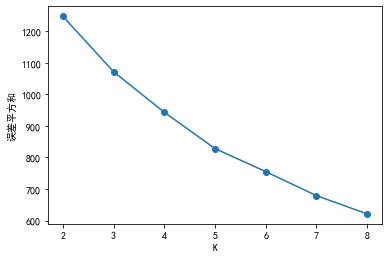

In [24]:
import warnings
warnings.filterwarnings("ignore")
SSE = []  # 存放每次结果的误差平方和
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(clus_df)
#     estimator.fit(df_features[['ZL']])
    SSE.append(estimator.inertia_)
X = range(2,9)
plt.xlabel('K')
plt.ylabel('误差平方和')
plt.plot(X,SSE,'o-')
plt.show()

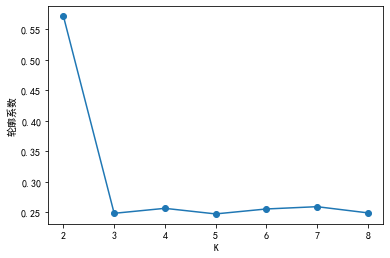

In [11]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

from sklearn.metrics import silhouette_score
 
Scores = []  # 存放轮廓系数
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(clus_df)
    Scores.append(silhouette_score(clus_df,estimator.labels_,metric='euclidean'))
X = range(2,9)
plt.xlabel('K')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
#inputfile = 'F:/Job/9.美团比赛/data0413.csv' #待聚类的数据文件
outputfile = 'F:/美团商分赛/聚类分析/聚类明细.xls' #保存结果的文件名
outputfile2 = 'F:/美团商分赛/聚类分析/聚类中心' #保存结果的文件名
# k = 5 #聚类的类别
k=[2,3,4,5]
iteration = 500 #聚类最大循环次数
#data_zs = pd.read_csv(inputfile,encoding='gbk',usecols=[3,4,5,6,7,8,9,10,11,12]) #读取数据
data_zs=clus_df
rrr=data_zs
co=data_zs.columns
for i in range(4):
    print()
    print('No . %d' %(i))
    b = pd.DataFrame(data_zs)
    a=k[i]
    model = KMeans(n_clusters = a, n_jobs = 4) #分为k类，并发数4
    model.fit(b) #开始聚类

    #简单打印结果
    r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
    r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
    r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
    r.columns = list(b.columns) + [u'类别数目%s'%i] #重命名表头
    print(r)
    r.to_excel(outputfile2+str(i)+'.xls') #保存结果

    #详细输出原始数据及其类别
    rrr = pd.concat([rrr, pd.Series(model.labels_, index =b.index)], axis = 1)  #详细输出每个样本对应的类别
    co= list(co) + [u'聚类类别%s'%i] #重命名表头
    
    rrr.columns = co
    rrr.to_excel(outputfile) #保存结果
    


No . 0
   常住人口(万人)  人口密度(人/平方公里)  常住人口增长率(‰)  地区生产总值(万元)  人均地区生产总值(元)  地区生产总值增长率(%)  \
0 -0.210003     -0.194872   -0.072718   -0.275737    -0.163622     -0.030795   
1  2.075328      1.925798    0.718622    2.724929     1.616972      0.304326   

     消费价格指数    生鲜电商数量  生鲜电商密度(家/每平方公里)  每万人生鲜电商数(家/万人)  类别数目0  
0  0.012474 -0.245131        -0.239061       -0.146182    168  
1 -0.123277  2.422468         2.362481        1.444623     17  

No . 1
   常住人口(万人)  人口密度(人/平方公里)  常住人口增长率(‰)  地区生产总值(万元)  人均地区生产总值(元)  地区生产总值增长率(%)  \
0 -0.102056     -0.366749   -0.218657   -0.324948    -0.526000     -0.306264   
1 -0.414732      0.131100    0.204064   -0.182405     0.523646      0.491647   
2  2.075328      1.925798    0.718622    2.724929     1.616972      0.304326   

     消费价格指数    生鲜电商数量  生鲜电商密度(家/每平方公里)  每万人生鲜电商数(家/万人)  类别数目1  
0 -0.479815 -0.160511        -0.231105        0.025357    110  
1  0.946127 -0.405617        -0.254149       -0.471515     58  
2 -0.123277  2.422468         2.362481

In [23]:
SSE

[1246.9023138717978,
 1071.3060759705804,
 941.7266187154772,
 825.5621000901401,
 754.4704967800305,
 683.6327872105692,
 609.550673928041]

In [25]:
Scores

[0.5715687890814276,
 0.2483792290770232,
 0.256534172877599,
 0.24738330261615082,
 0.25548591502910256,
 0.259254243390778,
 0.24909841462230403]